# MTH793P: Advanced Machine Learning, Semester B, 2023/2024

---

**Full Name:**

Viktor Penchev

**Student ID:**


230966576

---

### General instructions

First, enter your **Full Name** and **Student ID** in the fields above.

**Read the following information carefully before turning to the actual exercises.**

This final project assignment is scored on a scale of 100 marks and will contribute **60% of your final mark** for this module.

This project is due by **Friday, 31 May 2024, 17:00 GMT**.
Submissions received after this deadline will be treated in accordance with the College Regulations for late submissions: Up to seven days after the deadline, late submissions will incur a penalty of 5% of the total marks per 24 hours (or a fraction thereof). For example, a submission received on 1/6/2024 at 18:00 GMT (25 hours after the deadline) will result in a deduction of 10 marks. Any submission received more than 168 hours after the deadline will receive zero marks.

The lecturer will be available to answer reasonable questions about this assignment until **Friday, 24 May 2024, 17:00 GMT**. You can contact the lecturer by email ([o.bobrowski@qmul.ac.uk](mailto:o.bobrowski@qmul.ac.uk)).

You must use this Jupyter Notebook to answer all exercises. You are not allowed to remove any cells from this notebook. You can add Markdown or code cells as needed.

You must submit this Jupyter Notebook through QMPlus, using the submission system for this assignment. You cannot submit your attempt in any other way. Files sent by other means, including email, will not be considered.

You cannot submit any additional files apart from this Jupyter Notebook. The ZIP file you downloaded contains various auxiliary files that you will need for the exercises. However, there is no need to upload these auxiliary files. The original versions of these files will be merged into your submission automatically.


For **Markdown** exercises, **replace all occurrences of** `YOUR ANSWER HERE`  **by valid Markdown** to answer the question.

For **coding** exercises,
**replace all occurrences of**
```python
### YOUR CODE HERE
raise NotImplementedError()
```
**by valid Python code** to solve the problem.
In your solution, you can **only use** built-in Python functions and **functions from modules were imported for you in this template**.
Importing other modules is not allowed and will result in withdrawal of the corresponding marks.
If your code produces an error and you cannot fix it, write a comment to show that you are aware of the problem and indicate possible causes if you can.
You can get **partial credit**, so even if you cannot solve an exercise completely, try to answer as much as you can.


Finally, before you turn this project in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart Kernel) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All (Jupyter Notebook Version 6) or Run$\rightarrow$Run All Cells (Jupyter Notebook Version 7)). Please **do not change the file name** when you upload your Notebook to QMPlus.

<div class="alert alert-block alert-warning">
    Please answer all the questions below by writing your own Python code. Using or copy-pasting pre-existing code from any source is not permitted, and will be considered as <b>plagiarism</b> and addressed according to College Regulations. You are not allowed to collaborate with other students or ask for help from any other source, including, but not limited to, online forums or ChatGPT (or any other AI agent). By submitting your Notebook via QMPlus, you confirm that you have followed these rules and that the submitted code is your own work. Upon violation, you will fail this test with zero marks.</div>

---

### Coding style

#### Comments

Comments are an essential part of programming.
Use appropriate comments to explain the reasoning behind your code.

#### Variables & Functions

Use the variable and function names specified (**<font color=red>in red</font>**) in each exercise when writing your code. If you use other names, the testing of your code might fail, resulting in a reduced mark. For any additional variables/functions you define, choose meaningful, concise names.


It is perfectly fine if you define extra auxiliary functions to carry out a task. This is to say, even if the exercise only asks you to write a function `example_function`, you are free to add other functions like `example_function_aux`, `some_other_function`, ... and use them in your implementation of `example_function`.
Choose meaningful names for all auxiliary functions, too.

---

### Admitted features and imports

You are free to use any Python concepts or features that are built into the language. Furthermore, you can use any of the packages imported below. 
**You must not import any additional modules in any of the code you write.**

In [1]:
import numpy as np
from numpy.linalg import svd

import matplotlib.pyplot as plt

from skimage import data
from skimage import img_as_float
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from numpy.testing import assert_equal
from numpy.testing import assert_array_equal
from numpy.testing import assert_almost_equal
from numpy.testing import assert_array_almost_equal

---

# Part I - Image Compression with K-Means (20 points)

In this part we will explore the compression of colour images using the K-Means algorithm.<br>
A 24-bit RGB image uses $256 = 2^8$ possible values per colour-channel (Red/Green/Blue),
so that, each pixel in the image requires $3\times 8 = 24$ bits of storage. <br>
We would like to approximate such an image with an $n$-bit RGB image, where $n < 24$.


How do we choose the $2^n$ colour-intensity values, so that the image looks similar to the original image? <br>Your task is to show that this can be done with k-means clustering. 

For this part, use the k-means implementation in [**sklearn.cluster.KMeans**](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) (see documentation and examples in the link).

---

The following box loads an image from the **skimage** package and stores it in the variable **<font color=red>image</font>**.<br>
Choose any of the images by setting/removing the comment.

In [2]:
### IMAGE SELECTION ###
image = data.astronaut()
# image = data.rocket()
# image = data.colorwheel()

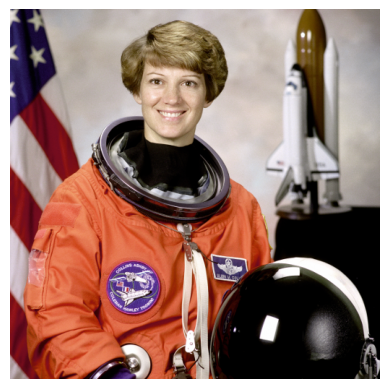

In [3]:
# Converting the values to float, and presenting the image.
image = img_as_float(image)
plt.imshow(image)
plt.axis('off')
plt.tight_layout;

Use **KMeans** (imported from sklearn.cluster) to apply the K-means clustering algorithm to the image you loaded.<br>
Set the number of clusters to be $2^\text{nbits}$, where **nbits** is number of bits used to store each pixel. <br>
Repeat the process for $\text{nbits} = 1,2,6$. Note that each image is a matrix of 480x480 RGB values, which you have to turn into a vector of 230,400 values.
<br>
The results should be stored as:<br>
- **<font color='red'>centers_\<i\> </font>** - an array containing the centers of the clusters. 
- **<font color='red'>labels_\<i\></font>**  - an array containing the labels for each pixel.<br>
    
    Where **<font color='red'>\<i\></font>** should be replaced with **<font color='red'>1,2,6</font>**.
    
    
**NOTE:** When using KMeans - use the default input parameters (except for number of clusters). 

In [4]:
### DO NOT REMOVE/EDIT THIS CELL ###

In [5]:
nbits = np.array([1, 2, 6])
clusters = 2 ** nbits

# Flatten the image to be of shape H*W x 3 (Note: none of the images are 480x480x3)
reshaped_image = image.reshape(-1, 3)

centers = []
labels = []
for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster, random_state=0, n_init='auto').fit(reshaped_image)      # Set 'n_init' to 'auto' to avoid warning
    centers.append(kmeans.cluster_centers_)
    labels.append(kmeans.labels_)

# Save the centers and labels to the appropriate variables
centers_1 = np.array(centers[0])
centers_2 = np.array(centers[1])
centers_6 = np.array(centers[2])
labels_1 = np.array(labels[0])
labels_2 = np.array(labels[1])
labels_6 = np.array(labels[2])

In [6]:
### DO NOT REMOVE/EDIT THIS CELL ###

Create a new image, where each pixel value is replaced by its nearest K-means center.<br>
Make sure the values you store are **between 0 and 1** (you can use **np.clip** for that).

Finally, before we can show the results, we need to convert the vector back to an image matrix. <br>
Store the final result in a variable named **<font color='red'>image_comp_\<i\></font>**, where you should replace **<font color='red'>\<i\></font>** with  **<font color='red'>1,2,6</font>**.

In [7]:
# Returns the compressed image given the centers and labels
def get_compressed_image(centers, labels):
    # Clip the values to be between 0 and 1
    centers = np.clip(centers, 0 , 1)
    # Get the compressed image
    compressed_image = centers[labels]
    # Reshape the image to its original shape
    compressed_image = compressed_image.reshape(image.shape)

    return compressed_image

image_comp_1 = get_compressed_image(centers_1, labels_1)
image_comp_2 = get_compressed_image(centers_2, labels_2)
image_comp_6 = get_compressed_image(centers_6, labels_6)

In [8]:
### DO NOT REMOVE THIS CELL ###

Visualise your results. Are they good?

In [9]:
# Plotting the three results.
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image_comp_1)
plt.axis('off')
plt.title('1 bit')

plt.subplot(1, 3, 2)
plt.imshow(image_comp_2)  
plt.axis('off')
plt.title('2 bit')

plt.subplot(1, 3, 3)
plt.imshow(image_comp_6)  
plt.axis('off')
plt.title('6 bit')

Text(0.5, 1.0, '6 bit')


Repeat this experiment for all the images in the block marked as **### IMAGE SELECTION ###**.<br>
To select a new image, simply comment out the current selection, and remove the comment from the image you want to check. <br>

The output for **one** of the images is noticalby inferior compared to the others.
In the next box, write down which image is has the worst output, and explain in words why this happens. After you checked all the images, leave one of them selected, you can choose any of the images.

#### Answer:

The compression of the color wheel is the worst, followed by the rocket image where the background is experiencing noticeable color banding, while the image of the astronaut is almost indistinguishable from the original at the lowest compression. The reason for the poor compression of the color wheel, as with the rocket background, is the smooth color gradient. The K-means algorithm is not able to capture the smooth transition between colors and instead tries to approximate the gradient with a few discrete colors. This results in the color banding effect. The astronaut image has a lot of sharp edges and high-contrast areas, which are easier to capture with the K-means algorithm.

---

# Part II - PCA for Eigenfaces (37 points)

In this part, we work with a dataset consisting of numerous faces and create a basis of so-called eigenfaces.<br>
The images are **192x168**, and are stored as vectors of length **32,256**.

This utility function will just let us convert an image from vector to matrix representation, so it can be showed on the screen.

In [10]:
def vec2img(vec):
    return np.reshape(vec,(168,192)).T

We load the faces database.<br>
**<font color='red'>FACES</font>** - an array where each entry is a collection of images of a single person <br>
**<font color='red'>NPEOPLE</font>** - number of people in the list (should be 20)<br>
**<font color='red'>NFACES</font>** - number of images per person (should be 64)

In [11]:
f = open('faces.npy','rb')
FACES = np.load(f)
NPEOPLE = len(FACES)
NFACES = 64
NR = int(np.sqrt(NFACES))
f.close()

---

### The Eigenfaces of a Single Person

First, we will examine the photos of a **single** person.<br>
**<font color='red'>PI</font>** - the index of the person we examine. <br>
**<font color='red'>X_person</font>** - the data matrix, containing all images of person PI, as columns.<br>

You can change **PI** as you wish, to experiment with the photos of different people.

We start by presenting all the photos. 

In [12]:
PI = 6

In [13]:
X_person =  FACES[PI]

plt.figure(figsize=(15,15))
for i in range(NFACES):
    im = vec2img(X_person[:,i])
    plt.subplot(NR,NR,i+1)
    plt.imshow(im,cmap='gray')
    plt.axis('off')

Next, we want to find the "**eigenfaces**", i.e., the directions of the principal components for this collection of images.<br>
When using PCA, we should do all the processing for the **centred** data, i.e., with mean 0.
Therefore, take the following steps:
1. Define **<font color='red'>M_person</font>** to be the mean of all images in **X_person** (should be a 32,256-dimensional vector).
1. Subtract **M_person** from all images. Place the result in **<font color='red'>XZ_person</font>**.
1. Find the left-singular vectors of **XZ_person** (i.e., the matrix U in the SVD). Place the result in **<font color='red'>U_person</font>**.

At the end of this process, the columns of **U_person** should represent the **eigenfaces**.<br>

**<font color=blue>IMORTANT:</font>** When using **svd** (from np.linalg), it is important to specify **full_matrices=False**. Otherwise, the algorithm aims to compute the full dimensional matrices, which are not needed and require a lot of memory.

In [14]:
# Find the mean and normalise
M_person = np.mean(X_person, axis=1)
XZ_person = X_person - M_person[:, np.newaxis]

# Perform SVD
U_person, _, _ = svd(XZ_person, full_matrices=False)

In [15]:
### DO NOT REMOVE/EDIT THIS CELL ###

We will present the mean face **M_person** along with the first 15 eigenfaces in **U_person**.

In [16]:
plt.figure(figsize=(15,15))

plt.subplot(4,4,1)
plt.imshow(vec2img(M_person), cmap='gray')
plt.axis('off')
plt.title('mean')

for i in range(15):
    plt.subplot(4,4,i+2)
    plt.imshow(vec2img(U_person[:,i]), cmap='gray')
    plt.axis('off')
    plt.title('$u_{%i}$' % (i+1))

Next, we want to try to get a feeling for what some of the eigenfaces represent.<br>
We start by exploring the role of the first 2 eigenfaces.<br>
To do so, we compute the reconstruction of **XZ_person** based on the first two principal components. We then add back the mean **M_person**.<br> The result should be placed in **<font color='red'>X12</font>**.

In [17]:
# Find the projection of the first 2 principal components
projection = np.dot(U_person[:,0:2].T, XZ_person)

# Reconstruct the original image
X12 = np.dot(U_person[:,0:2], projection)

In [18]:
### DO NOT REMOVE/EDIT THIS CELL ###

We present the results for all the images. <br>

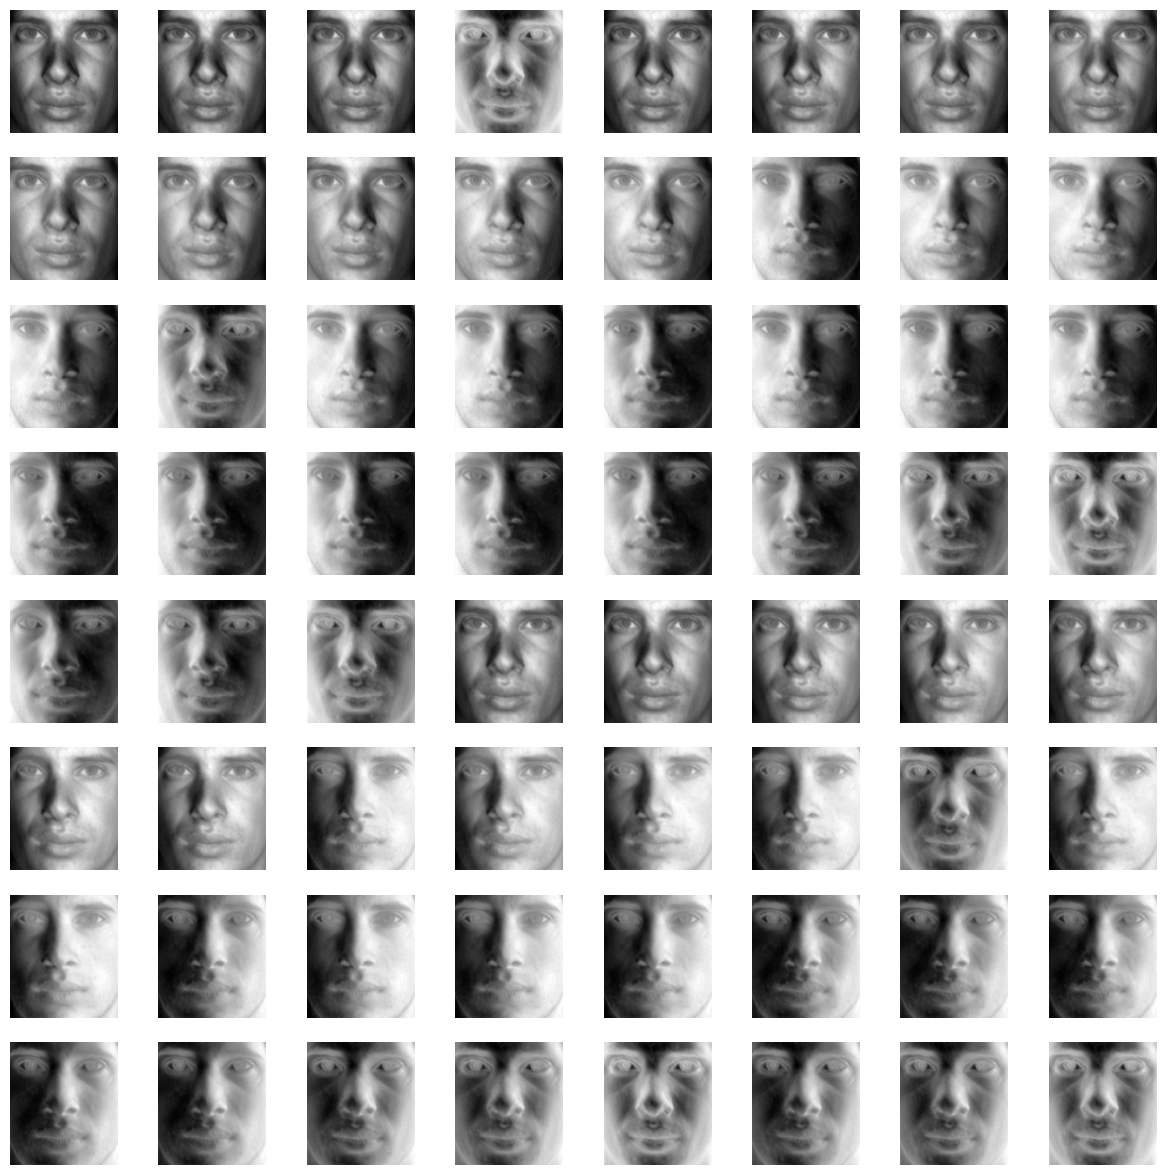

In [19]:
plt.figure(figsize=(15,15))
for i in range(NFACES):
    im = vec2img(X12[:,i])
    plt.subplot(NR,NR,i+1)
    plt.imshow(im,cmap='gray')
    plt.axis('off')

**<font color='blue'>Question:</font>** Can you notice the effect of these two eigenfaces? what do you think they represent?

#### Answer:

The first and second eigenfaces seem to capture the overall facial features of the person when lit from the right and left, respectively. We can see that in images where the facial features are clearly visible and the light falls relatively straight on, the reconstruction using just the first two eigenfaces works pretty well. However, when the lighting is severely shifted to one side, causing deep shadows on the face, the reconstruction is poor, and the image appears negative. In such cases, the facial features (eyes, nose, and mouth) are not always present because these two eigenfaces contain no information about how shadows would obscure them. Additionally, it is clear that these two eigenfaces fail to represent light coming from above or below.

Next, we will do the same but for the 3rd and 4th eigenfaces. Place the result in **<font color='red'>X34</font>**.

In [20]:
# Find the projection of the data onto the 3rd and 4th principal components
projection = np.dot(U_person[:,2:4].T, XZ_person)

# Reconstruct the image
X34 = np.dot(U_person[:,2:4], projection)

In [21]:
### DO NOT REMOVE/EDIT THIS CELL ###

In [22]:
plt.figure(figsize=(15,15))
for i in range(NFACES):
    im = vec2img(X34[:,i])
    plt.subplot(NR,NR,i+1)
    plt.imshow(im,cmap='gray')
    plt.axis('off')

**<font color='blue'>Question:</font>** Can you notice the effect of these two eigenfaces? Is it the same or different than the previous two?

#### Answer:

Similar to the first two eigenfaces, the third and fourth eigenfaces contain a lot of information on the general facial features, but with the light coming from the top and bottom, respectively. The reconstructions using these two eigenfaces are again lacking when deep shadows are present. However, it's clear that these two eigenfaces do not represent general facial features as effectively as the first two. The lower-order eigenfaces seem less adept at accurately capturing distinct facial features like the eyes, nose, and mouth, as they tend to represent more subtle variations that may not be as critical for depicting core facial characteristics.

---

### The Eigenfaces of a Collection of People

Next, we will have a similar exercise, but instead of taking a single person, we will take **all** of them (together).

We place all the images in **<font color='red'>X_all</font>** and show a random collection of them.

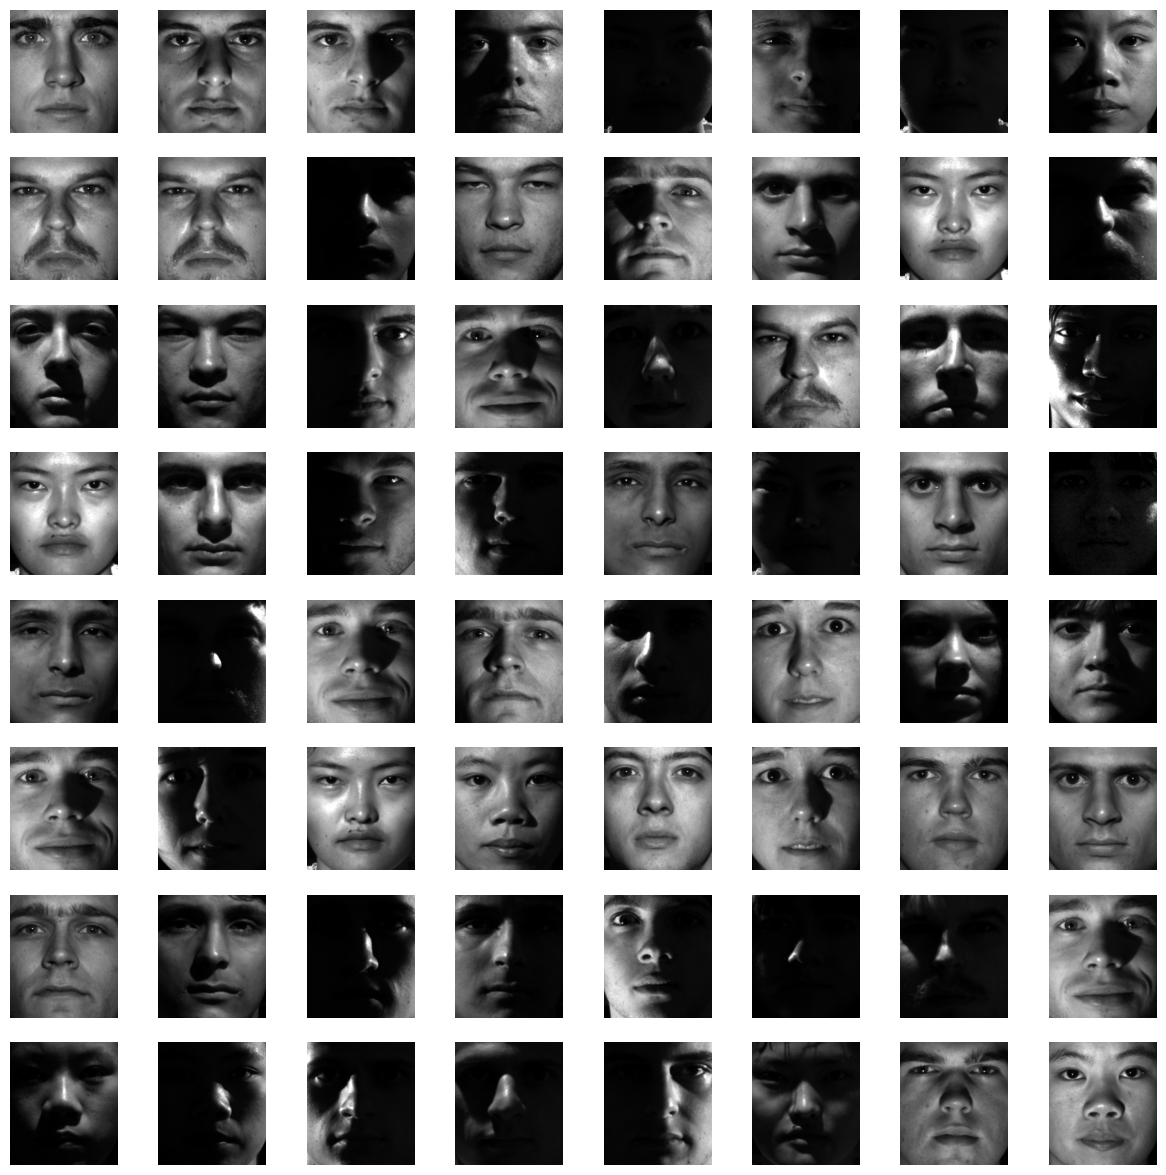

In [23]:
X_all = np.concatenate(FACES,1)
         
plt.figure(figsize=(15,15))
for i in range(NFACES):
    j = np.random.randint(NFACES*NPEOPLE)
    im = vec2img(X_all[:,j])
    plt.subplot(NR,NR,i+1)
    plt.imshow(im,cmap='gray')
    plt.axis('off')

Find the eigenfaces in this case. This step is similar to what we did for a single person.<br>
Here, in addition to storing the singular vectors in **<font color='red'>U_all</font>**, you should also save the **singular values**. <br>
Make sure the singular values are stored in **<font color='red'>S_all</font>**.

This calculation can be a bit slow, but shouldn't take more than 20 seconds.

In [24]:
# Calculate the mean and normalise
M_all = np.mean(X_all, axis=1)
XZ_all = X_all - M_all[:, np.newaxis]

# Perform SVD
U_all, S_all, _ = svd(XZ_all, full_matrices=False)

In [25]:
### DO NOT REMOVE/EDIT THIS CELL ###

Present the mean and the first 15 eigenfaces.

In [26]:
plt.figure(figsize=(15,15))

plt.subplot(4,4,1)
plt.imshow(vec2img(M_all), cmap='gray')
plt.axis('off')
plt.title('mean')

for i in range(15):
    plt.subplot(4,4,i+2)
    plt.imshow(vec2img(U_all[:,i]), cmap='gray')
    plt.axis('off')
    plt.title('$u_{%i}$' % (i+1))

In the next box we try to test the effect of the  eigenfaces in different way. <br>
For each eigenface **u<sub>i</sub>** we want to show the image **M + t $\cdot$ u<sub>i</sub>**, where **t** is in $\big[-\frac{\sigma_i}{20},\frac{\sigma_i}{20}\big]$, and $\sigma_i$ is the corresponding singular value.<br>
The list **<font color='red'>I</font>** indicates which eigenfaces to examine. You can experiment with different indexes.

In [27]:
I = [0,1,2,3,4,5]
NT = 11
SCALE = 20

Fill in the missing code.

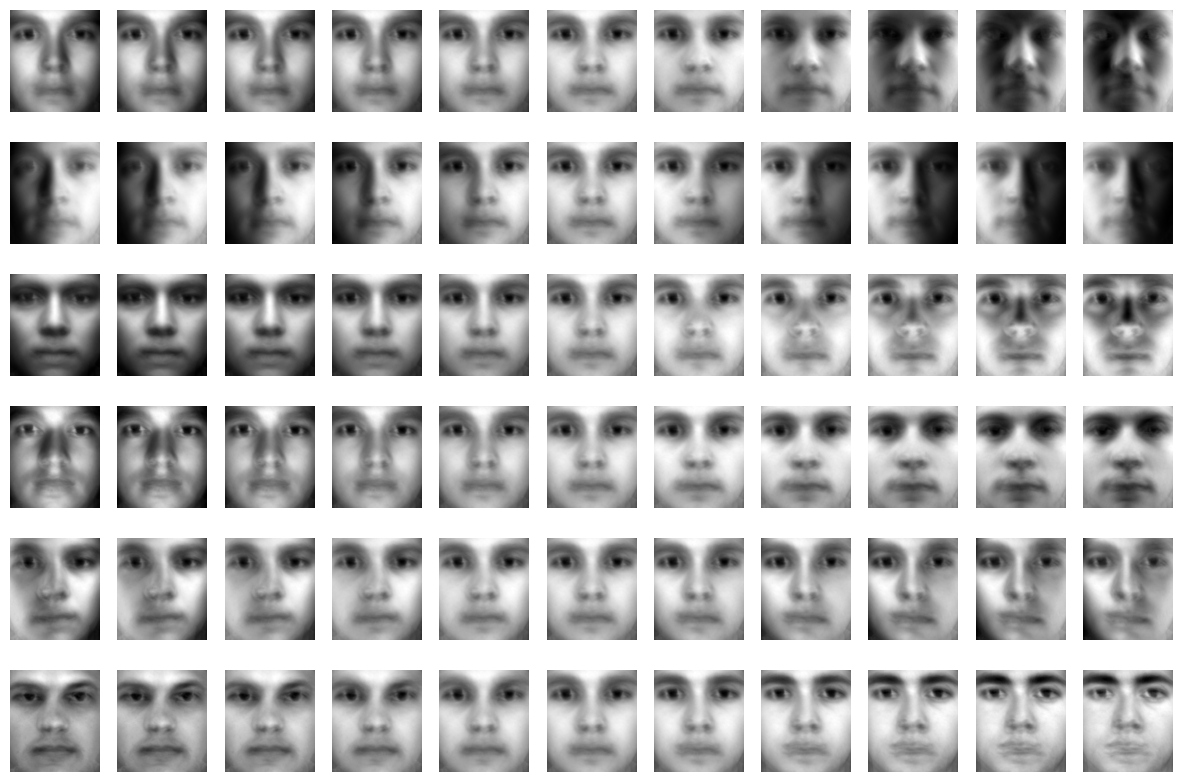

In [28]:
NI = len(I)
M = X_all.mean(1)

plt.figure(figsize=(15,10))
for i in range(NI):
    T = np.linspace(-S_all[I[i]]/SCALE,S_all[I[i]]/SCALE,NT)
    for j in range(NT):
        # Generate the new images
        im = M + T[j]*U_all[:,I[i]]

        plt.subplot(NI,NT, i*NT+j+1)
        plt.imshow(vec2img(im),cmap='gray')
        plt.axis('off')

In [29]:
### DO NOT REMOVE/EDIT THIS CELL ###

**<font color='blue'>Question:</font>** Can you notice the effects of the different eigenfaces? 

#### Answer:

The effects of the first six eigenfaces are as such:
1. The first eigenface represents the global structure of a face derived from all the images. It features the prominent features - eyes, nose, and mouth. Subtracting it from the mean results in a face with more defined features, while adding it amounts to a sort of featureless "ghost face".
2. The second eigenface captures light coming directly from the side. It is very clear how subtracting it from the mean results in a face lit from the right, while adding it results in a face lit from the left.
3. The third eigenface contains information on how light coming from directly above or below the face hits it. On the left, we see a face lit from the top, while on the right, the face is lit from the bottom.
4. The fourth eigenface appears to contain information on feminine/masculine features. Subtracting it from the mean results in a more feminine-looking face, while adding it gives us a more masculine structure.
5. The fifth eigenface seems to capture face asymmetries. On the two sides, we see that the mouth is slightly slanted in different ways. Here we notice how the effects of the eigenfaces become more ambiguous as we explore the lower-ranked ones.
6. With the sixth eigenface, again we see ambiguous effects. When adding the eigenface to the mean, we see an increase in eyebrow thickness, a change in eye and nose shape, and a raise in the mouth position. Interestingly, on the far right, we see the presence of two mouths.


Take the **first** image in the dataset, and place it in **<font color=red>im_test_1</font>**. Using the eigenfaces in **U_all**, modify the image so that it is **<font color=green>light on the left</font>** and **<font color=green>dark on the right</font>**. Save the result in **<font color=red>im_left_1</font>**. Similalry, make a version that is light on the right and dark on the left, and store it in **<font color=red>im_right_1</font>**. 

Repeate the same steps for the **50th** image, and store the results in **<font color=red>im_test_50, im_left_50, im_right_50</font>**.

In [30]:
# Get the first and 50th image
im_test_1 = FACES[0][:,0]
im_test_50 = FACES[0][:,49]

# Modification parameters
t = S_all[1] / 20
scale = 0.7

# Create the modified images
im_left_1 = im_test_1 + scale * t * U_all[:,1]
im_right_1 = im_test_1 - scale * t * U_all[:,1]

im_left_50 = im_test_50 + scale * t * U_all[:,1]
im_right_50 = im_test_50 - scale * t * U_all[:,1]

Present the original and modified images.

Text(0.5, 1.0, 'Light on the right')

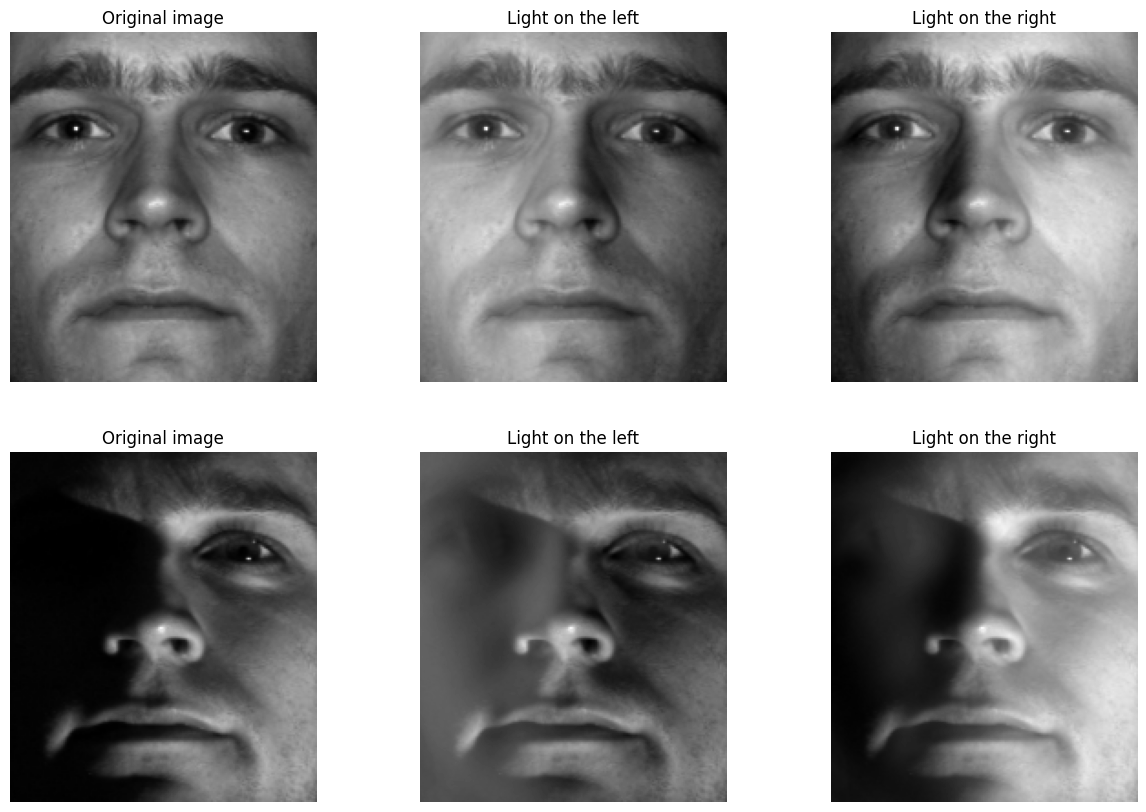

In [31]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.imshow(vec2img(im_test_1),cmap='gray')
plt.axis('off')
plt.title('Original image')

plt.subplot(2,3,2)
plt.imshow(vec2img(im_left_1),cmap='gray')
plt.axis('off')
plt.title('Light on the left')

plt.subplot(2,3,3)
plt.imshow(vec2img(im_right_1),cmap='gray')
plt.axis('off')
plt.title('Light on the right')

plt.subplot(2,3,4)
plt.imshow(vec2img(im_test_50),cmap='gray')
plt.axis('off')
plt.title('Original image')

plt.subplot(2,3,5)
plt.imshow(vec2img(im_left_50),cmap='gray')
plt.axis('off')
plt.title('Light on the left')

plt.subplot(2,3,6)
plt.imshow(vec2img(im_right_50),cmap='gray')
plt.axis('off')
plt.title('Light on the right')

**<font color='blue'>Question:</font>** Does the results look good? Do you notice a difference between the images? Try to discuss this.

#### Answer:

In the previous part, we saw that the second eigenface contains information on the light coming from the left and right. I therefore applied a similar procedure to the one before and added and subtracted $t = \frac{\sigma_i}{20}$ times the second eigenface from the 1st and 50th images. I additionally introduced a scale parameter which is multiplied by the eigenface before adding or subtracting it from the image. In the end, I set the scale to $0.7$.

The results for the 1st image look a lot better than for the 50th image. In the 1st image, the light is coming directly from the front, and it looks very similar to the mean face. As a linear combination of eigenfaces, it contains low amounts of noise from lower-order eigenfaces. Solely using the second eigenface to change the direction of light there is sufficient and works well. In contrast, the 50th face is lit from the right, and the left side is in deep shadow. It contains more information from lower-order eigenfaces, and reversing the shadow would require a more complex linear combination of eigenfaces. The results using just the second eigenface are, as expected, not good. The resulting images have less defined features and exhibit a general failure to affect the light direction as intended.

---

# Part III -  Matrix Completion (33 points)

In this part, we perform  matrix completion  using the **Singular Value Thresholding** (SVT) algorithm we saw in class.<br>
Given an incomplete matrix **M**, recall that our objective is to solve:
$$ X^* = \arg\min_{X} \tau\|X|_* + \frac{1}{2} \|X\|_F^2\quad\text{subject to}\quad P_{\Omega}(X)=P_\Omega(M),$$
where $\Omega$ represents the set of indexes where the values of **M** are **known**.

The SVT algorithm should have the following update iterations:
$$
\begin{split}
X^{(k+1)} &= D_\tau(Y^{(k)}),\\
Y^{(k+1)} &= Y^{(k)} + \beta P_\Omega(M-X^{(k+1)}).\end{split}
$$
The starting value should be $Y^{(0)} = 0$.<br> 
The algorithm should stop after $k$ steps if:
$$ \frac{\|P_\Omega(M)-P_\Omega(X^{(k)})\|_F}{\|P_\Omega(M)\|_F} \le \text{tolerance}.$$


Place your code in the function **<font color='red'>matrix_complete</font>**. It should take the following input:
* **<font color='red'>M</font>** - the incomplete matrix in $\mathbb{R}^{D\times N}$. The **known** values are assumed to be between 0 and 1, and an unknown value will be marked by **<font color='red'>-1</font>**.
* **<font color='red'>tolerance</font>** - the maximum tolerance to decide when iterations should stop. The default value is $8.1\times 10^{-5}$.
* **<font color='red'>beta_val</font>** - a value for the increment size $\beta$.<br>
If **beta_val** is not specified (=None), the default value should be $\beta = 0.82\times\frac{D\times N}{K}$, where **K** is the number of **known** entries in **M**.
* **<font color='red'>tau_val</font>** - a value for the shrinking size $\tau$. <br>
If **tau_val** is not specified (=None), the default value should be $\tau = 0.37\times\max(D,N)$.
* **<font color='red'>max_iter</font>** - maximum number of iterations to run.
* **<font color='red'>iter_print</font>** - how often to print out a progress line.

The output of the function should be the final value of **<font color='red'>X</font>**.



In [32]:
### IF YOU NEED SOME AUXILIARY FUNCTIONS YOU CAN PLACE THEM HERE
### (ALSO OK TO LEAVE EMPTY IF YOU DON'T)

# Returns the projection of X onto the set of indices omega
def p_omega(X, known_indices):
    result = np.zeros_like(X)
    result[known_indices] = X[known_indices]
    return result

# Soft thresholding operator
def shrink(X, tau):
    return np.sign(X) * np.maximum(np.abs(X) - tau, 0)

# D_tau(X) operator
def svd_threshold(X,tau):
    U,S,V = svd(X, full_matrices=False)
    return U@np.diag(shrink(S, tau))@V

# Returns Frobenius norm of a matrix    # !!!! Rewrite from scratch
def frobenius_norm(X):
    return np.sqrt(np.sum(np.abs(X)**2))

# Return the progress bar
def progress_bar(metric):
    # Check if the metric is between 0 and 1
    if metric < 0 or metric > 1:
        return f"Stopping metric is expected to be between 0 and 1 (Algorithm is not properly converging)."

    # How close we are to zero
    progress = 1 - metric

    # Define the length of the progress bar
    length = 50

    # Calculate the number of '#' characters
    num_hashes = int(progress * length)

    # Create the progress bar
    bar = '#' * num_hashes + '-' * (length - num_hashes)

    # Print the progress bar
    return f"[{bar}] {progress * 100:.2f}%"

In [33]:
def matrix_complete(M, tolerance=8.1e-5, beta_val=None, tau_val=None, max_iter=10000, iter_print=100):
    # Find the indices of the known values
    known_indices = np.where(M != -1)

    # Set default values for beta and tau
    if beta_val is None:
        beta_val = 0.82 * (M.shape[0] * M.shape[1]) / len(known_indices[0])
    if tau_val is None:
        tau_val = 0.37 * max(M.shape)
    
    # Initialize the matrices
    Y = np.zeros(M.shape)
    X = np.zeros(M.shape)
    iter_ = 0
    stopping_metric = 1

    # Run the algorithm
    while (stopping_metric > tolerance or stopping_metric < 0) and iter_ < max_iter:
        
        # Update the matrices
        X = svd_threshold(Y, tau_val)
        Y += beta_val * p_omega(M - X, known_indices)

        stopping_metric = frobenius_norm(p_omega(M, known_indices) - p_omega(X, known_indices)) / frobenius_norm(p_omega(M, known_indices))

        # Print the progress
        if iter_ % iter_print == 0 or iter_ == max_iter - 1:
            # Calculate the calue of the stopping metric
            print(f"Step {iter_}: Stopping metric = {stopping_metric:.2f}  {progress_bar(stopping_metric)}")
        
        iter_ += 1

    # Print the final message
    if iter_ == max_iter:
        print(f"Algorithm did not converge after {max_iter} iterations.")
    else:
        print(f"Algorithm converged after {iter_} iterations.")

    return X

In [34]:
### DO NOT REMOVE/EDIT THIS CELL ###

np.random.seed(11232)
M_test = np.random.rand(4,5)
M_test[0,2] = -1
M_test[3,1] = -1
M_test[1,0] = -1
M_test[2,3] = -1

X_correct = np.array([[0.28184808, 0.22232085, 0.25328388, 0.50521773, 0.82542652],
       [0.21899948, 0.0900134 , 0.84216102, 0.65204837, 0.01802106],
       [0.07918562, 0.90582226, 0.65758943, 0.15359926, 0.48446993],
       [0.3112642 , 0.23217241, 0.88039408, 0.6651078 , 0.32746706]])

X_test = matrix_complete(M_test, tolerance=1e-4, beta_val = 0.5*20/16, tau_val=1.0)

assert_almost_equal(X_test, X_correct)


print('--- TEST PASSED ---')

Step 0: Stopping metric = 1.00  [--------------------------------------------------] 0.00%
Algorithm converged after 50 iterations.
--- TEST PASSED ---


The function **<font color='red'>matrix_corrupt</font>** takes a matrix **X**, assuming to have positive values, and with probability **P** replaces each element with a value of **<font color='red'>-1</font>** to mark it as a **missing value**.

In [35]:
def matrix_corrupt(X, P):
    Xnew = np.array(X)
    R = np.random.rand(X.shape[0], X.shape[1])
    IDX = np.where(R<P)
    Xnew[IDX] = -1
    return Xnew

---

### RGB Images
We will use the matrix completion algorithm to correct missing values in RGB images.<br>
We will us the same photo selection as in Part I. Examine all the pictureד, and leave one selected when you submit your project (doesn't matter which).

In [36]:
### IMAGE SELECTION ###
# image = data.astronaut()
image = data.rocket()
# image = data.colorwheel()

In [37]:
# Converting the RGB values into the range [0,1]
image = img_as_float(image)

The missing values can appear in any of the R/G/B channels independently.<br> Therefore, if the image is of width  **W** and height **H**, we will process it as a matrix with **H rows** and **3W columns**.<br>
We start by writing functions to convert between the two formats.

You will need to code two functions:
* **<font color=red>im2mat</font>** - converts an image from an **(H x W x 3)** 3d-array to an **(H x 3W)** matrix.
* **<font color=red>mat2im</font>** - converts an **(H x 3W)** matrix back into an **(H x W x 3)** 3d-array.

In [38]:
def im2mat(image):
   
    # Transpose the image to swap the last two dimensions
    image = image.transpose((0, 2, 1))
    
    # Reshape the image to shape (H, 3W)
    mat = image.reshape(image.shape[0], -1)

    return mat

def mat2im(mat):

    # Reshape the matrix back to shape (H, 3, W)
    image = mat.reshape(mat.shape[0], 3, -1)
    
    # Transpose the image to swap the last two dimensions
    image = image.transpose((0, 2, 1))

    return image

Testing the **im2mat** and **mat2im** functions.

In [39]:
### DO NOT REMOVE/EDIT THIS CELL ###

np.random.seed(2343234)

test_im = np.random.rand(2,3,3)
test_mat = im2mat(test_im)
test_im_2 = mat2im(test_mat)

test_mat_RES = np.array([[0.21435714, 0.9483089 , 0.26014289, 0.85474945, 0.3003837 ,
        0.86430052, 0.74878394, 0.44215536, 0.28218045],
       [0.75837569, 0.50741801, 0.90138123, 0.99696511, 0.55819116,
        0.91226562, 0.92116696, 0.96942254, 0.63157848]])

assert_array_almost_equal(test_mat, test_mat_RES)
assert_array_almost_equal(test_im_2, test_im)


print('--- TEST PASSED ---')

--- TEST PASSED ---


Next, convert the photo stored in **image** to a matrix using **im2mat**, save the result in **<font color=red>im_mat</font>**.

In [65]:
# Convert the image to a matrix
im_mat = im2mat(image)

If all was done well, presenting **im_mat** you should see 3 copies of the same photo.

(-0.5, 1919.5, 426.5, -0.5)

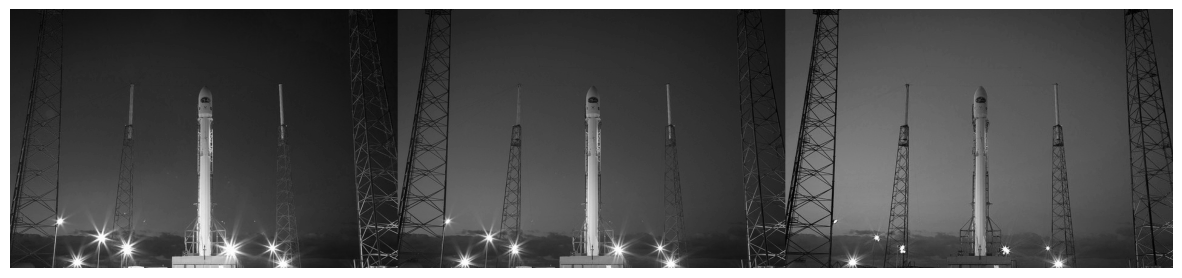

In [66]:
plt.figure(figsize=(15,5))
plt.imshow(im_mat, cmap='gray');
plt.axis('off')

Next, we will erase random values from the matrix, to simulate missing values.<br>
Use the function **matrix_corrupt** to generate a copy of **im_mat** with missing values. Use **P=0.3**, and save the result in **<font color=red>im_mat_cor</font>**. 

In addition, since we will want to show what the corrupt image looks like, we will have to convert the matrix version back to an RGB format. Store the RGB version in **<font color=red>im_cor</font>**. Note that when presenting the image, the values are expected to be between 0 and 1. Since our missing values are **-1** it will damage the view. Use **np.clip** to amend this (only for **im_cor**, do NOT do this for **im_mat_cor**).

In [67]:
# Corrupt the image matrix
im_mat_cor = matrix_corrupt(im_mat, 0.3)

# Convert the matrix back to RGB and clip the values
im_cor = np.clip(mat2im(im_mat_cor), 0, 1)

In [68]:
### DO NOT REMOVE/EDIT THIS CELL ###

The next step is to complete the missing value in the matrix **im_mat_cor**. To do that, use the function **matrix_complete** you coded earlier. Run it with $\beta=1.23$, $\tau=97$, and max_iter=50. Store the result in **<font color=red>im_mat_comp</font>**.

After the matrix completion is done, convert the matrix back into an image, and clip the values like you did earlier. Store the result in **<font color=red>im_comp</font>**. 

In [69]:
# Generate the recovered image
im_mat_comp = matrix_complete(im_mat_cor, beta_val=1.23, tau_val=97, max_iter=50, iter_print=10)

# Convert the matrix back to RGB and clip the values
im_comp = np.clip(mat2im(im_mat_comp), 0, 1)

Step 0: Stopping metric = 1.00  [--------------------------------------------------] 0.00%


Step 10: Stopping metric = 0.17  [#########################################---------] 83.24%
Step 20: Stopping metric = 0.13  [###########################################-------] 87.09%
Step 30: Stopping metric = 0.10  [#############################################-----] 90.45%
Step 40: Stopping metric = 0.07  [##############################################----] 92.79%
Step 49: Stopping metric = 0.06  [###############################################---] 94.06%
Algorithm did not converge after 50 iterations.


In [70]:
### DO NOT REMOVE/EDIT THIS CELL ###

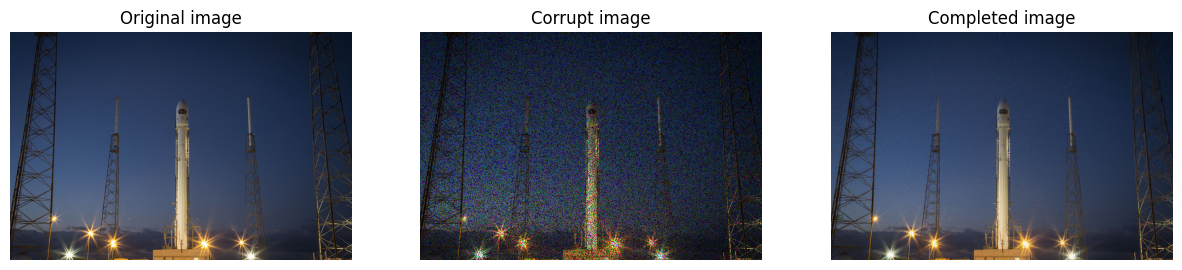

In [71]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(image)
plt.axis('off')
plt.title('Original image')

plt.subplot(1,3,2)
plt.imshow(im_cor);
plt.axis('off');
plt.title('Corrupt image')

plt.subplot(1,3,3)
plt.imshow(im_comp)
plt.title('Completed image')
plt.axis('off');

The box below is free form.
Repeat the experiment above, but try to test the effect of the parameters **P**, **tolerance**, $\beta$, $\tau$, etc.
When you submit your final version, include 2 examples, and discuss the results in the box below. Make sure that the examples you choose demonstrate some differences that you can discuss. Use the same variable names, so they are properly displayed in the following box.

In [72]:
# Define the nuclear norm function to check the performance
def nuclear_norm(X):
    _, S, _ = np.linalg.svd(X, full_matrices=False)
    return np.sum(S)

In [73]:
### SETTING -1-

# Set the parameters
P = 0.3
tolerance = 8.1e-5
beta_val = 1.5
tau_val = 100

# Corrupt the image
im_mat_cor = matrix_corrupt(im_mat, P)
im_cor = np.clip(mat2im(im_mat_cor), 0, 1)

# Complete the image
im_mat_comp = matrix_complete(im_mat_cor, beta_val=beta_val, tau_val=tau_val, max_iter=50, iter_print=10)
im_comp = np.clip(mat2im(im_mat_comp), 0, 1)

# Print the nuclear norms
print(f"Nuclear norm of original: {nuclear_norm(im_mat)}")
print(f"Nuclear norm of corrupted: {nuclear_norm(im_mat_cor)}")
print(f"Nuclear norm of recovered: {nuclear_norm(im_mat_comp)}")

Step 0: Stopping metric = 1.00  [--------------------------------------------------] 0.00%


Step 10: Stopping metric = 0.16  [##########################################--------] 84.46%
Step 20: Stopping metric = 0.12  [############################################------] 88.38%
Step 30: Stopping metric = 0.08  [#############################################-----] 91.93%
Step 40: Stopping metric = 0.06  [##############################################----] 93.85%
Step 49: Stopping metric = 0.05  [###############################################---] 95.04%
Algorithm did not converge after 50 iterations.
Nuclear norm of original: 994.6817073190017
Nuclear norm of corrupted: 10661.717587521069
Nuclear norm of recovered: 756.988444445368


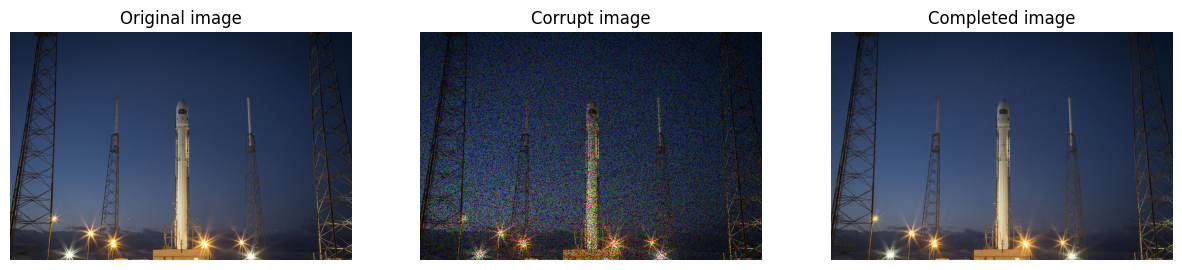

In [74]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(image)
plt.axis('off')
plt.title('Original image')

plt.subplot(1,3,2)
plt.imshow(im_cor);
plt.axis('off');
plt.title('Corrupt image')

plt.subplot(1,3,3)
plt.imshow(im_comp)
plt.title('Completed image')
plt.axis('off');

In [75]:
### SETTING -2-

# Set the parameters
P = 0.3
tolerance = 8.1e-5
beta_val = 1.5
tau_val = 5

# Corrupt the image
im_mat_cor = matrix_corrupt(im_mat, P)
im_cor = np.clip(mat2im(im_mat_cor), 0, 1)

# Complete the image
im_mat_comp = matrix_complete(im_mat_cor, beta_val=beta_val, tau_val=tau_val, max_iter=50, iter_print=10)
im_comp = np.clip(mat2im(im_mat_comp), 0, 1)

# Print the nuclear norms
print(f"Nuclear norm of original: {nuclear_norm(im_mat)}")
print(f"Nuclear norm of corrupted: {nuclear_norm(im_mat_cor)}")
print(f"Nuclear norm of recovered: {nuclear_norm(im_mat_comp)}")

Step 0: Stopping metric = 1.00  [--------------------------------------------------] 0.00%
Step 10: Stopping metric = 0.00  [#################################################-] 99.91%
Step 20: Stopping metric = 0.00  [#################################################-] 99.99%
Algorithm converged after 21 iterations.
Nuclear norm of original: 994.6817073190017
Nuclear norm of corrupted: 10671.155349326946
Nuclear norm of recovered: 1617.6208177167848


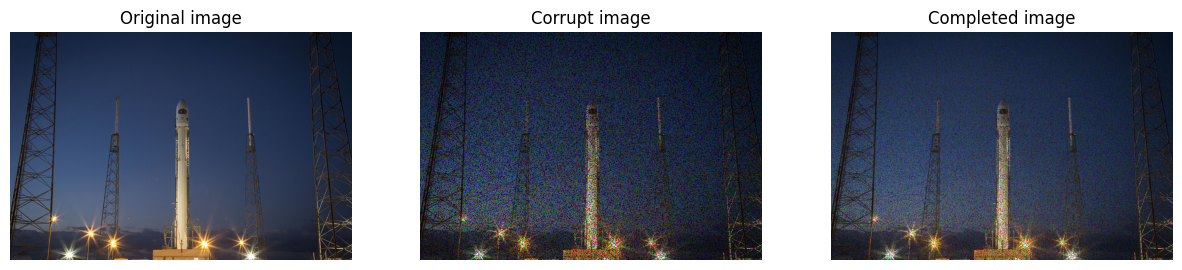

In [76]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(image)
plt.axis('off')
plt.title('Original image')

plt.subplot(1,3,2)
plt.imshow(im_cor);
plt.axis('off');
plt.title('Corrupt image')

plt.subplot(1,3,3)
plt.imshow(im_comp)
plt.title('Completed image')
plt.axis('off');

Discuss the results here, in particular,  the effect of the different parameter values (e.g., on the quality of the output, speed of convergence, etc.), and possible reasons for these effects.

#### Answer:

The Singular Value Thresholding algorithm provides a solution to the minimisation problem 
    $$\ \min_{X}  \tau \lVert X \rVert _* + \frac{1}{2}\lVert X \rVert ^ 2 _F \ s.t. \ P_\Omega(X) = P_\Omega(M) \ $$
and when $\tau\rightarrow\infty$ it converges to 
    $$\ \min_{X}  \lVert X \rVert _* \ s.t. \ P_\Omega(X) = P_\Omega(M) \ $$ 
$\tau$ therefore acts as a regularization parameter, influencing the trade-off between fitting the observed data (or constraints) and promoting simplicity or low-rank solutions. When $\tau$ is set too low, it means that the regularization term associated with the nuclear norm is given very little importance compared to the fidelity term, which aims to ensure that the solution matches the observed entries of the matrix closely. This can result in the algorithm overfitting the data, with the solution capturing the noise in the data rather than the underlying structure or patterns. This is exactly what we observe in the two examples above. In both of them, $P = 0.3$, $\beta = 1.5$, and the tolerance is kept at the default $8.1e-5$, with $\tau$ being set to $100$ in the first example, and $5$ in the second. In the first example, the algorithm converges to a solution that is very close to the original image, while the second solution still contains some of the noise from the corruption. We can also see that the nuclear norm of the first completed matrix is lower than that of the second, signifying lower complexity. Setting a high value for $\tau$ is therefore preferable as it promotes the finding of a lower-rank solution that captures the underlying structure of the data, rather than the noise. This, however, comes at a computational cost and the algorithm takes longer to converge.

The parameter $\beta$ is the step parameter and it determines how much the algorithm should move in the direction of the gradient. A high value for $\beta$ means that the algorithm will take larger steps, which can lead to faster convergence, but also to overshooting and divergence of the algorithm. When a reasonable value for $\beta$ is chosen, the value of the stopping metric, $\frac{\|P_\Omega(M)-P_\Omega(X^{(k)})\|_F}{\|P_\Omega(M)\|_F}$ decreases monotonically with the number of iterations, starting at $1$ and converging to $0$. Taking a $\beta$ that is too high, however, leads to the algorithm overshooting the minimum and the stopping metric falling outside of the $[0,1]$ range. The choice of $\beta$ is therefore crucial for the convergence of the algorithm, and it is important to strike a balance between fast convergence and stability.

The parameter $P$ affects the amount of corrupted pixels in the image. Increasing $P$ leads to a noisier image containing less information about the original. A higher $P$ makes it harder for the algorithm to recover the original as the patterns within are less prominent. This leads to blurier images, however, the algorithm converges faster as there are less constraints to satisfy. Furthermore, increasing $P$ leads to solutions with smaller nuclear norms, again due to the lack of constraints.

The rest of the parameters, $tolerance$ and $max\_iter$, pertain to the number of iterations of the algorithm. Their effects are very straight-forward and intuitive and I will therefore not discuss them here.